<a href="https://www.kaggle.com/code/orestasdulinskas/customer-segmentation?scriptVersionId=163333064" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![segmentation](https://www.appier.com/hubfs/Imported_Blog_Media/GettyImages-1150668297-1.jpg)

# Customer Segmentation and Insights in Retail: A Data-Driven Approach
---

## Background

In today's competitive retail landscape, understanding customer behavior and preferences is crucial for business success. This project leverages the Global Superstore dataset, a rich collection of sales data from a hypothetical multinational retail corporation, to uncover insights that can drive strategic decision-making and improve business performance.

## Objective

The primary objective of this project is to segment customers based on their purchasing behavior and preferences, using clustering techniques. By identifying distinct customer segments, retailers can tailor marketing strategies, optimize inventory management, and enhance the overall shopping experience to drive customer loyalty and satisfaction.

## Data

The dataset contains information about sales transactions from a hypothetical multinational retail corporation. It includes details about products, customers, orders, and sales across different regions and product categories. Key columns include:

* Row ID: A unique identifier for each row in the dataset.
* Order ID: A unique identifier for each sales order.
* Order Date: The date when the order was placed.
* Ship Date: The date when the order was shipped.
* Ship Mode: The shipping method used for the order.
* Customer ID: A unique identifier for each customer.
* Customer Name: The name of the customer.
* Segment: The market segment to which the customer belongs.
* Postal Code: The postal code of the customer's location.
* City: The city of the customer's location.
* State: The state or province of the customer's location.
* Country: The country of the customer's location.
* Region: The region of the customer's location.
* Market: The market in which the sale occurred.
* Product ID: A unique identifier for each product.
* Category: The category to which the product belongs.
* Sub-Category: The sub-category to which the product belongs.
* Product Name: The name of the product.
* Sales: The total sales amount for the order.
* Quantity: The quantity of the product sold.
* Discount: The discount applied to the order.
* Profit: The profit generated from the order.
* Shipping Cost: The cost of shipping the order.
* Order Priority: The priority of the order.

This dataset provides a rich and detailed view of sales transactions, allowing for analysis of customer behavior, product performance, and regional sales trends. It is well-suited for customer segmentation and insights projects in the retail industry.

# Data Cleaning
---

In [1]:
# Import dataset
import pandas as pd

path = r'/kaggle/input/global-superstore/global_superstore_2016.xlsx'
df = pd.read_excel(path)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [2]:
df.info() # Summary of DataFrame information

print('\nNumber of unique values in each column')
for i in df.columns:
    print(f'{i} - {df[i].nunique()}')

print('\nNumber of missing values in each column\n', df.isnull().sum())

print('\nNumber of duplicated rows\n', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [3]:
df.drop('Postal Code', axis=1,inplace=True) # Drop a column with missing values

In [4]:
#Creating MRF Table Strategy (Monetary Value, Recency, Frequency)
import datetime

df_s = pd.DataFrame()
snapshot_date = max(df['Order Date']) + datetime.timedelta(days=1)
customers = df.groupby(['Customer ID']).agg({'Order Date': lambda x: (snapshot_date - x.max()).days,'Order ID': 'count','Sales': 'sum'})
customers.rename(columns = {'Order Date': 'Recency','Order ID': 'Frequency', 'Sales': 'Amount'}, inplace=True)

customers.head()

,Recency,Frequency,Amount
Customer ID,,,
AA-10315102,359,6,544.656
AA-10315120,960,1,2713.410
AA-10315139,150,13,2955.798
AA-103151402,185,6,4780.552
AA-103151404,819,3,753.508


In [5]:
print('Length of the dataset:', len(customers))

Length of the dataset: 17415


In [6]:
customers.describe() # Checking the stats of all the columns

,Recency,Frequency,Amount
count,17415.000000,17415.000000,17415.000000
mean,508.087913,2.945162,725.954746
std,400.619145,2.399473,1064.751183
min,1.000000,1.000000,0.556000
25%,149.000000,1.000000,98.345000
50%,422.000000,2.000000,326.994000
75%,804.000000,4.000000,912.854000
max,1461.000000,26.000000,23669.196000


# Exploratory Data Analysis
---

#### Statistical outliers

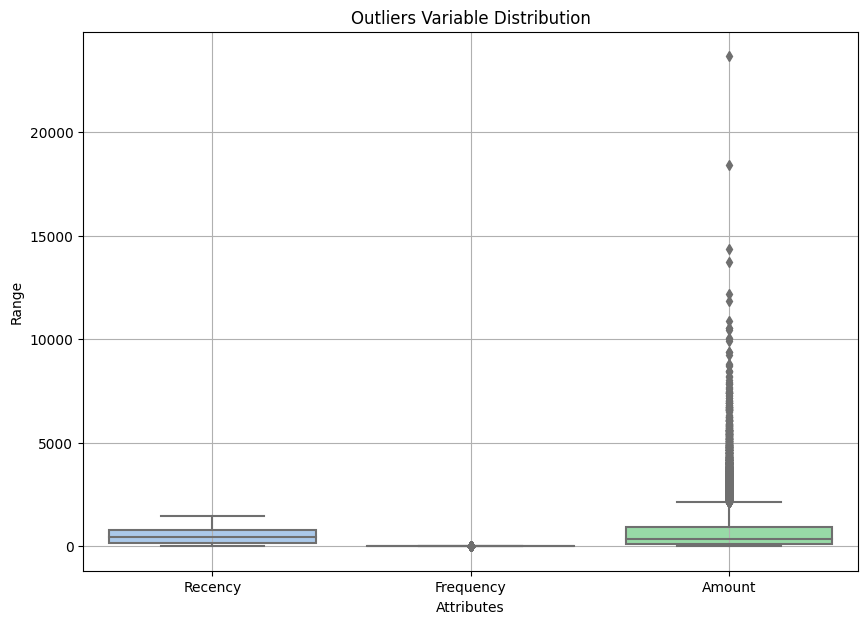

In [7]:
# Checking for statistical outliers
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.style.use('seaborn-v0_8-pastel')
colors = sns.color_palette('pastel')
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 7))
sns.boxplot(data=customers, palette='pastel')
plt.xlabel("Attributes")
plt.ylabel("Range")
plt.title("Outliers Variable Distribution")
plt.grid(True)
plt.show()

In [8]:
# Removing (statistical) outliers for Amount
Q1 = customers['Amount'].quantile(0.05)
Q3 = customers['Amount'].quantile(0.95)
IQR = Q3 - Q1
customers = customers[(customers['Amount'] >= Q1 - 1.5*IQR) & (customers['Amount'] <= Q3 + 1.5*IQR)]

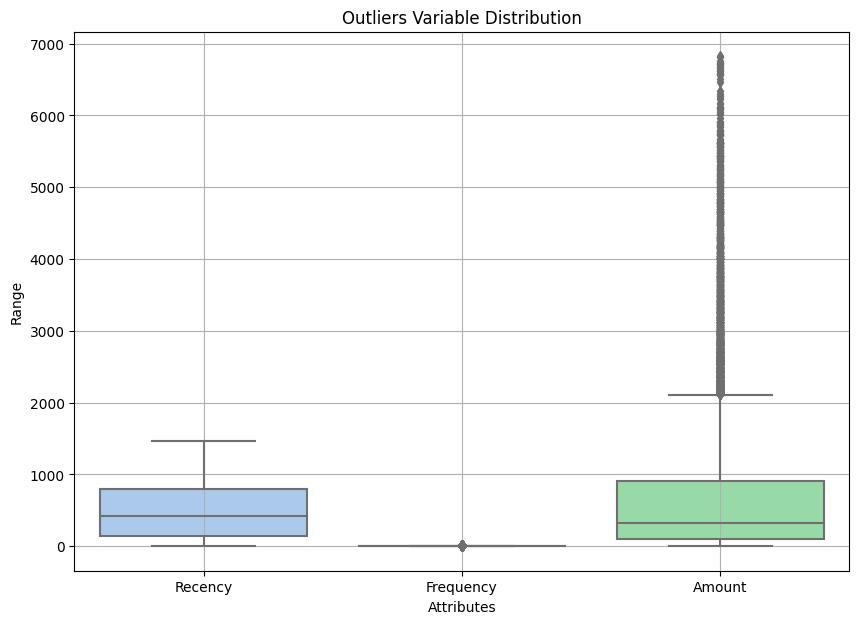

In [9]:
# Checking the result of removing statistical outliers for Amount
plt.figure(figsize=(10, 7))
sns.boxplot(data=customers, palette='pastel')
plt.xlabel("Attributes")
plt.ylabel("Range")
plt.title("Outliers Variable Distribution")
plt.grid(True)
plt.show()

#### RFM Distribution (with Transformations)

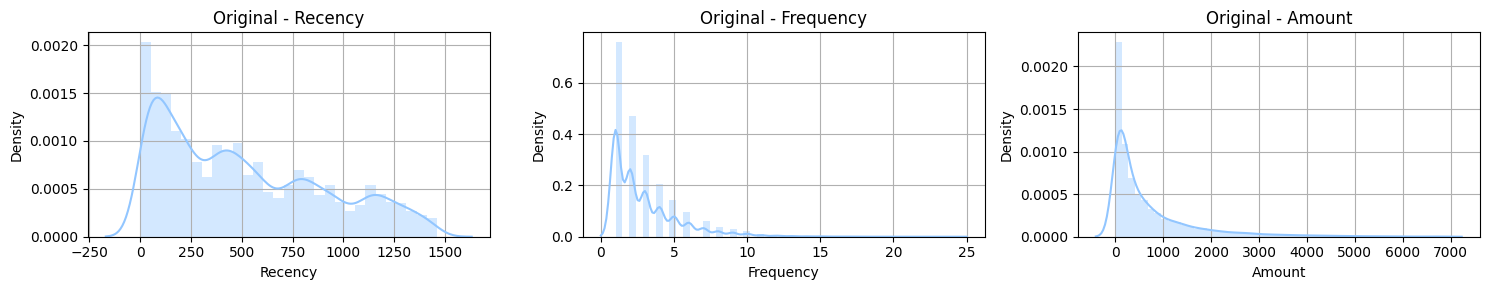

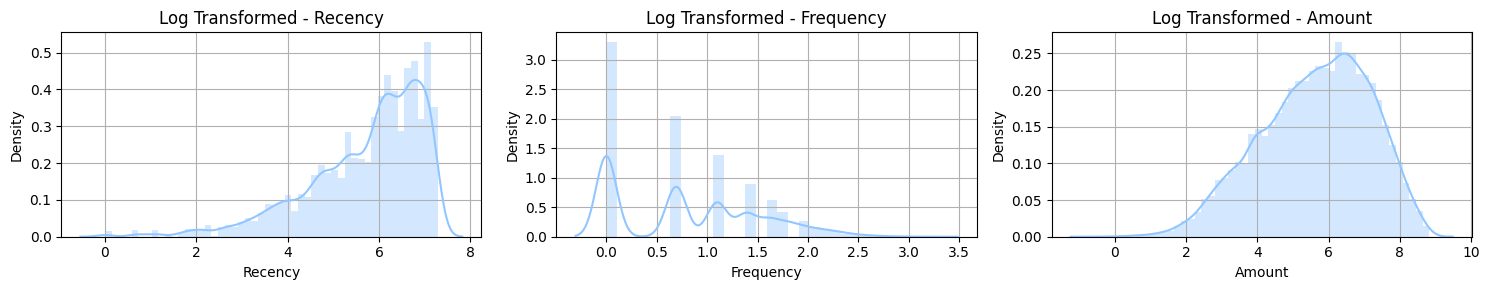

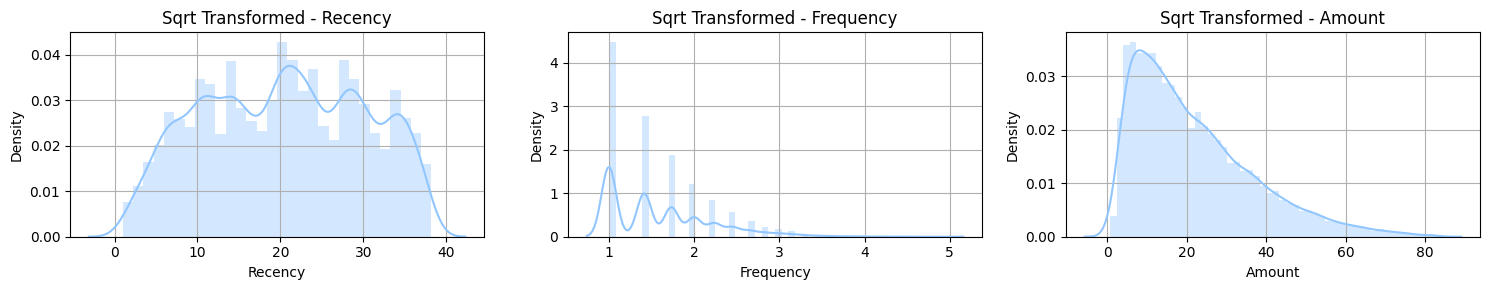

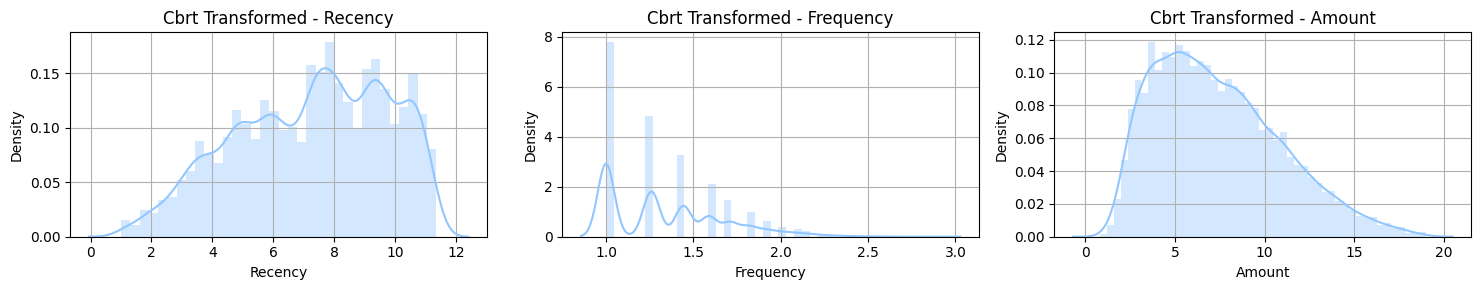

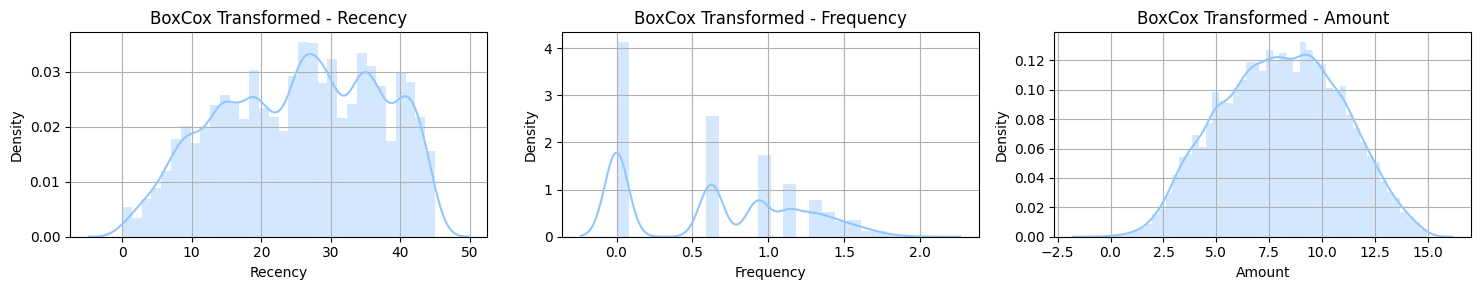

In [10]:
import numpy as np
from scipy import stats
import math

n=3
nf = [i for i in customers.columns]

cutomers_logT = customers.copy(deep=True)
cutomers_sqrtT = customers.copy(deep=True)
cutomers_cbrtT = customers.copy(deep=True)
cutomers_bxcxT = customers.copy(deep=True)

for i in customers.columns:
    cutomers_logT[i] = np.log(customers[i])
    cutomers_sqrtT[i] = np.sqrt(customers[i])
    cutomers_cbrtT[i] = np.cbrt(customers[i])
    cutomers_bxcxT[i] = stats.boxcox(customers[i])[0]
    
for stat, title in zip([customers, cutomers_logT, cutomers_sqrtT, cutomers_cbrtT, cutomers_bxcxT],
                      ['Original - ', 'Log Transformed - ', 'Sqrt Transformed - ', 'Cbrt Transformed - ', 'BoxCox Transformed - ']):
    plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
    for c in range(len(nf)):
        plt.subplot(math.ceil(len(nf)/n),n,c+1)
        sns.distplot(stat[nf[c]])
        plt.title(title + nf[c])
        plt.grid(True)
    plt.tight_layout()
    plt.show()

**Observations**: By overserving the plots, it is clear that data is more symmetrical with box-cox transformations

In [11]:
# Applying the selected Transformations
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["Amount"] = stats.boxcox(customers['Amount'])[0]
customers_fix.head()

,Recency,Frequency,Amount
0,24.370300,1.378648,9.101909
1,37.537591,0.000000,12.624669
2,16.366295,1.776105,12.830476
3,18.039386,1.378648,14.023801
4,35.039856,0.932747,9.764511


#### 3D projection of the dataset

In [12]:
import plotly.express as px

fig = px.scatter_3d(customers_fix, x='Amount', y='Frequency', z='Recency',
                     labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Recency': 'Recency'})

fig.update_layout(
    scene=dict(
        xaxis_title='Amount',
        yaxis_title='Frequency',
        zaxis_title='Recency',
    ),
    title='Amount, Frequency, and Recency',
    width=800,
    height=800
)

fig.show()

# Pre-processing
---

#### Rescaling the attributes

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)

# Clustering
---

#### Elbow Method to determine the number of clusters to be formed

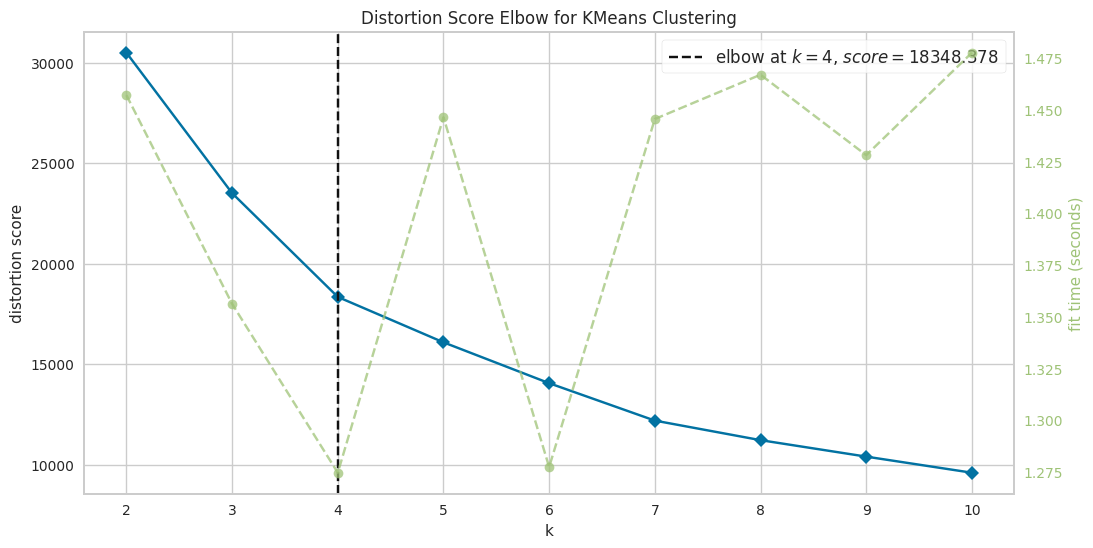

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

plt.figure(figsize=(12,6)) 
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(customers_normalized)
Elbow_M.show()

**Observations**: The above cell indicates that four will be an optimal number of clusters for this data.

#### Silhouette Analysis to determine the number of clusters to be formed

In [15]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(customers_normalized)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(customers_normalized, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(k, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3570426246872932
For n_clusters=3, the silhouette score is 0.3126305042517019
For n_clusters=4, the silhouette score is 0.31073377196401214
For n_clusters=5, the silhouette score is 0.2865719765736034
For n_clusters=6, the silhouette score is 0.30266516750957023
For n_clusters=7, the silhouette score is 0.3043020987171391
For n_clusters=8, the silhouette score is 0.29655571279903625
For n_clusters=9, the silhouette score is 0.2885769426858228
For n_clusters=10, the silhouette score is 0.2951625979391324


**Observations**: Silhouette analysis indicates that 2,3 or 4 would be most optimal number of clusters for this dataset. Based on Elbow Method, we will use 4 clusters.

#### Final KMeans model using 4 clusters

In [16]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(customers_normalized)

customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Amount':['mean', 'count']}).round(2)

Recency Frequency   Amount      
           mean      mean     mean count
Cluster                                 
0        155.21      1.51   198.96  3562
1        835.34      1.18   143.71  4585
2        762.99      3.41   879.65  4940
3        158.53      5.42  1512.22  4277

#### Visualising the Cluster Chartecteristics

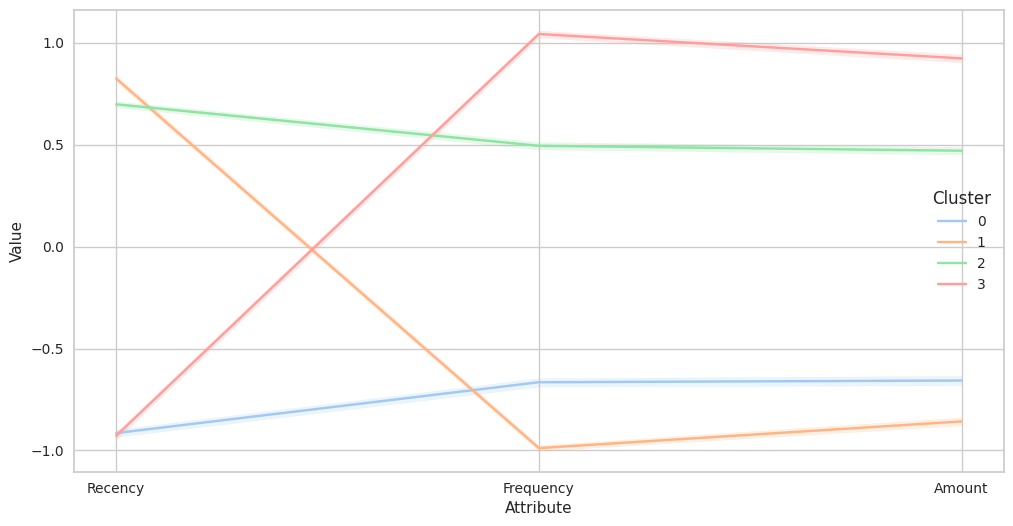

In [17]:
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'Amount'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_

# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','Amount'],
                      var_name='Attribute',
                      value_name='Value')

# Visualize it
plt.figure(figsize=(12,6)) 
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=df_nor_melt, palette=colors)
plt.grid(True)
plt.show()

**Observations**: 
Based on the results of KMeans clustering, four distinct customer segments have been identified:

* The first segment (blue line) has low recency, indicating that these customers have made recent purchases, and they also exhibit a slightly higher frequency and amount of purchases compared to the third segment. This segment likely represents a group of customers who are somewhat engaged with the retail corporation but are not as active or valuable as those in other segments.
* The second segment (orange line) has very high recency, indicating that these customers have not made recent purchases, and they also exhibit very low frequency and amount of purchases. This suggests that they are inactive or lapsed customers who have not engaged with the retail corporation recently and have made few and low-value purchases.
* The third segment (green line) has high recency, frequency, and amount, indicating that these customers have made recent, frequent, and high-value purchases. This segment likely represents a group of loyal and valuable customers who consistently make significant purchases.
* The fourth segment (red line) is characterized by very low recency, indicating that these customers have made recent purchases, and they also exhibit very high frequency and amount of purchases. This suggests that they are frequent and high-value customers who are actively engaged with the retail corporation.

In [18]:
customers['Cluster'] = customers['Cluster'].replace({0: '3rd - Medium value', 1:'4th - Lapsed customers', 2:'2nd - Loyal-Consistent', 3:'1st - Highest value'})

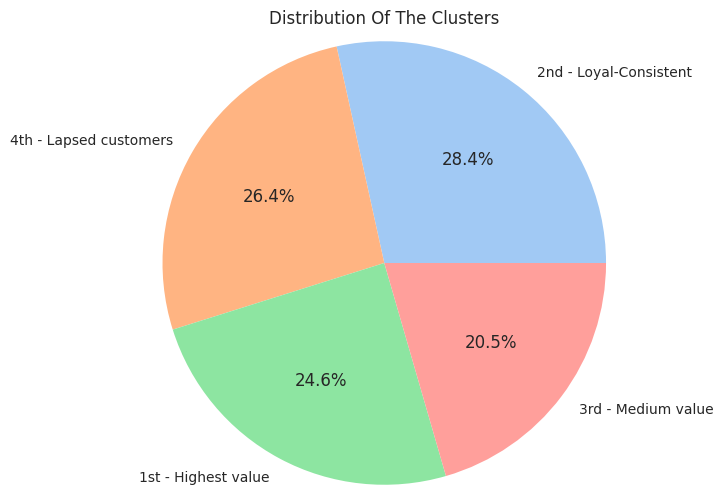

In [19]:
plt.figure(figsize=(12,6))
subject = customers["Cluster"].value_counts().reset_index(name='Count')
plt.pie(subject['Count'], labels=subject['Cluster'],autopct='%1.1f%%', radius=1.2, startangle=0, colors=colors)
plt.title("Distribution Of The Clusters")
plt.show()

**Observations**: All clusters are relatively equal sized

#### Cluster box plots by Amount, Recenty and Frequency

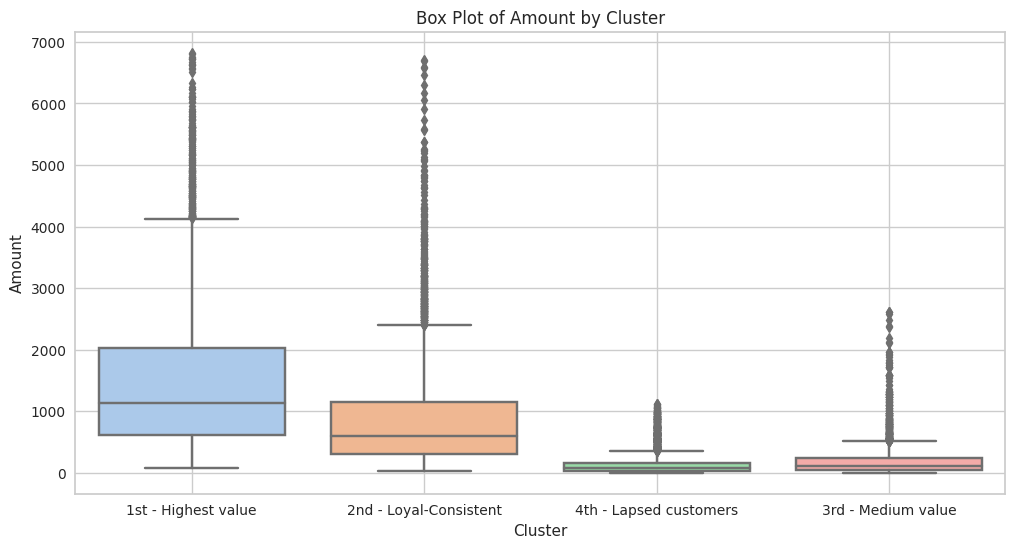

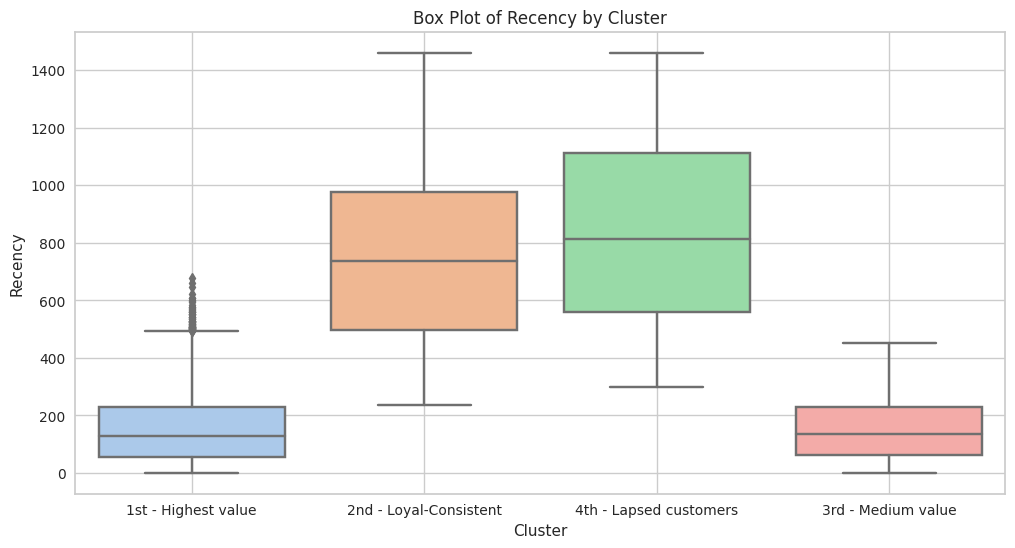

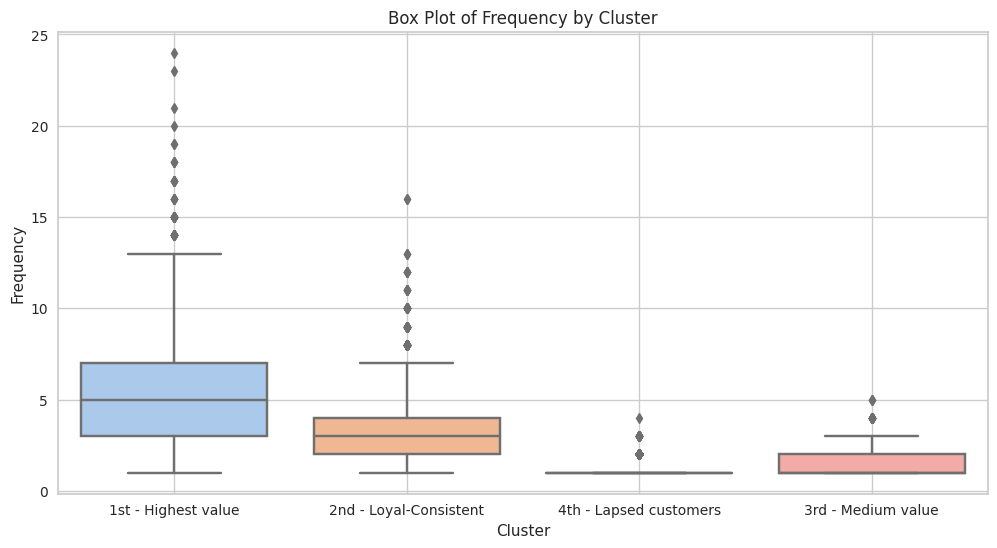

In [20]:
for i in ['Amount', 'Recency', 'Frequency']:
    summary = customers.groupby("Cluster")[i].describe()

    # Create box plots
    plt.figure(figsize=(12,6))
    sns.boxplot(x='Cluster', y=i, data=customers, palette=colors)
    plt.xlabel("Cluster")
    plt.ylabel(i)
    plt.title("Box Plot of {0} by Cluster".format(i))
    plt.grid(True)
    plt.show()

#### Pair plot for each feature

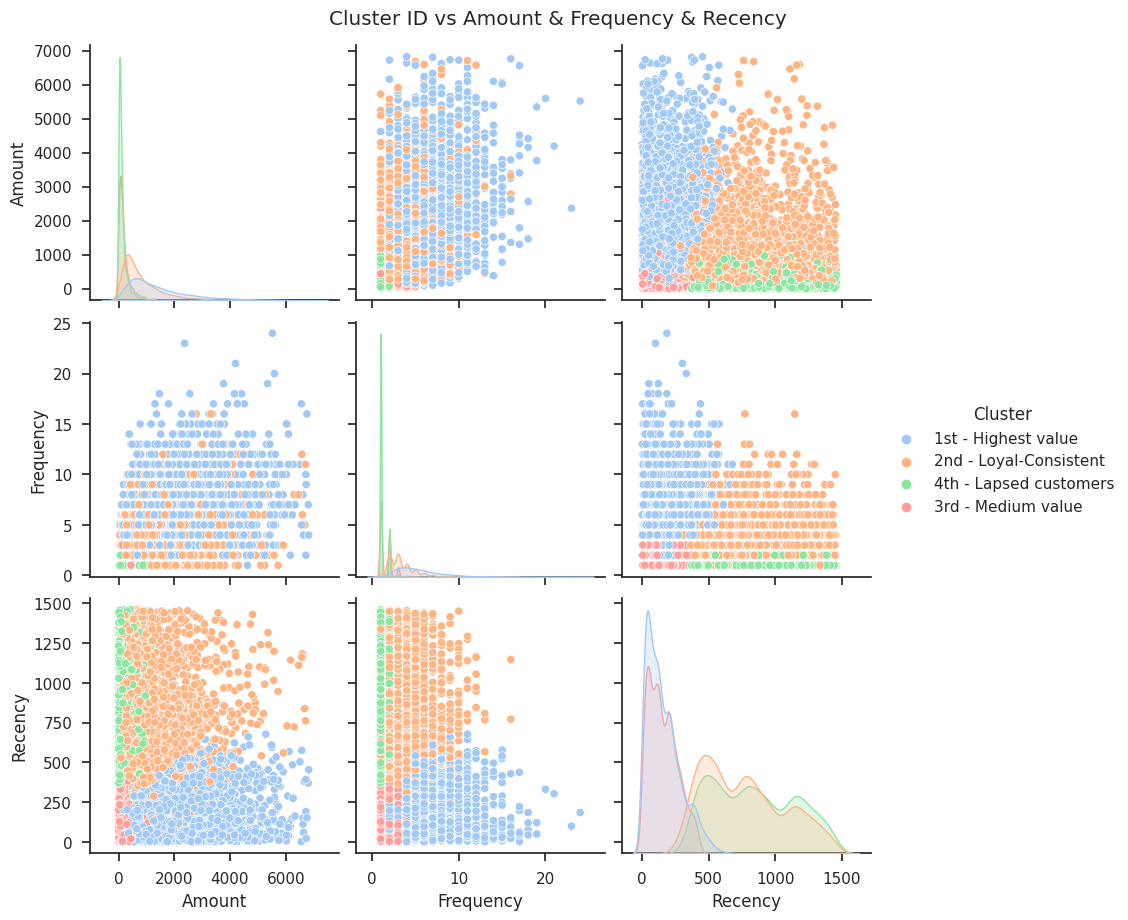

In [21]:
sns.set(style="ticks")
sns.pairplot(customers, hue='Cluster', vars=['Amount', 'Frequency', 'Recency'], height=3, aspect=1, palette=colors)
plt.suptitle('Cluster ID vs Amount & Frequency & Recency', y=1.02)
plt.grid(True)
plt.show()

#### Scatter plot for Amount and Frequency

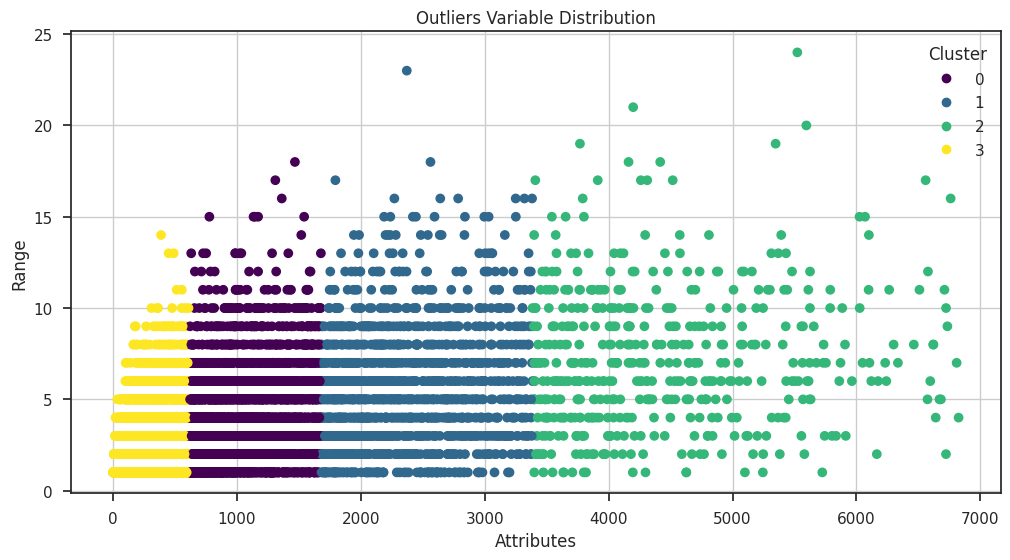

In [22]:
# Selecting the two features for clustering
data_for_clustering = customers[['Amount', 'Frequency']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4)
customers['Cluster_2D'] = kmeans.fit_predict(data_for_clustering)

# Create a DataFrame containing the selected attributes
plt.figure(figsize=(12,6))
sc = plt.scatter(customers['Amount'], customers['Frequency'], c=customers['Cluster_2D'], cmap='viridis')
plt.xlabel("Attributes")
plt.ylabel("Range")
plt.title("Outliers Variable Distribution")
handles, labels = sc.legend_elements()
plt.legend(handles, labels,title='Cluster', loc='upper right')
plt.grid(True)
plt.show()

#### Scatter plot for Amount, Frequency and Recency

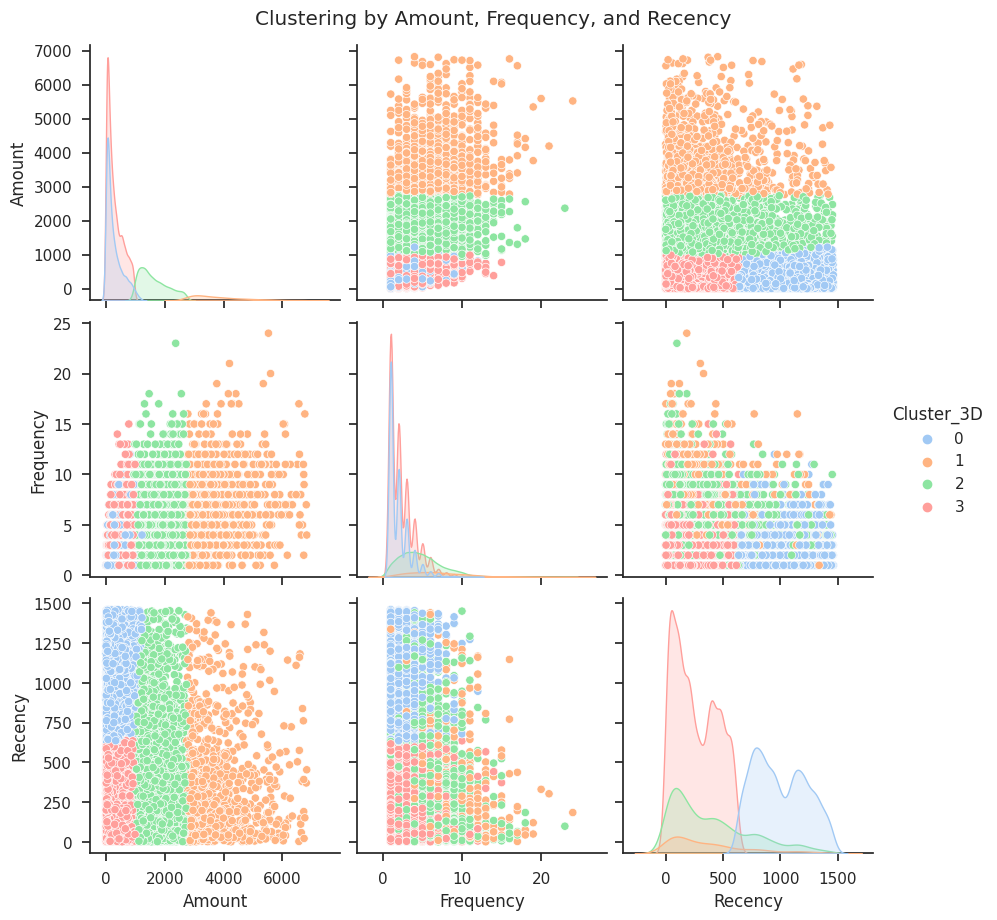

In [23]:
# Selecting the three features for clustering
data_for_clustering = customers[['Amount', 'Frequency', 'Recency']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4)
customers['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Visualize the clusters (scatter plot matrix)
sns.set(style="ticks")
sns.pairplot(customers, hue='Cluster_3D', vars=['Amount', 'Frequency', 'Recency'], height=3, aspect=1, palette=colors)
plt.suptitle('Clustering by Amount, Frequency, and Recency', y=1.02)
plt.grid(True)
plt.show()

#### 3D projection of clusters

In [24]:
# Create a 3D scatter plot matrix with Plotly
fig = px.scatter_3d(customers, x='Amount', y='Frequency', z='Recency', color='Cluster_3D',
                     labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Recency': 'Recency', 'Cluster_3D': 'Cluster'})

fig.update_layout(
    scene=dict(
        xaxis_title='Amount',
        yaxis_title='Frequency',
        zaxis_title='Recency',
    ),
    title='Clustering by Amount, Frequency, and Recency',
    width=800,
    height=800
)

fig.show()

# Conclusion

In conclusion, the project has successfully applied KMeans clustering to the Global Superstore dataset to segment customers based on their purchasing behavior. By identifying distinct customer segments, the project has provided valuable insights that can inform strategic decision-making and improve business performance in the retail industry. The identified customer segments include:

High-Value, Frequent Customers: This segment consists of customers with very low recency, but very high frequency and amount of purchases. These customers are likely to be loyal and valuable, making frequent and high-value purchases.

High-Value, Recent Customers: This segment includes customers with high recency, frequency, and amount of purchases. These customers are likely to be loyal and valuable, making recent, frequent, and high-value purchases.

Low-Value, Inactive Customers: This segment comprises customers with very high recency, but very low frequency and amount of purchases. These customers are likely to be inactive or lapsed, making few and low-value purchases.

Moderate-Value, Recent Customers: This segment consists of customers with low recency, but slightly higher frequency and amount of purchases compared to the third segment. These customers are somewhat engaged with the retail corporation but are not as active or valuable as those in the first and second segments.

Overall, the project has demonstrated the power of customer segmentation and insights in driving strategic decision-making and improving business performance in the retail industry. By understanding the distinct needs and behaviors of different customer segments, retailers can tailor their marketing strategies, optimize inventory management, and enhance the overall shopping experience to drive customer loyalty and satisfaction.